# IOT Project: decision tree model analysis in Python

# 
This project is an application in machine learning with Python coding. There is a list of data (Titanic.csv) I collected through Internet https://www.encyclopedia-titanica.org/titanic-passenger-list/, which contains the imformation about the passengers on Titanic. In this project, I will implement the decision tree model to catalogue the massive data and draw a decision tree with 80% of the data; then test and validate the model with rest of data.  

Step1: install the pandas, matplotlib, graphviz, pydotplus and sklearn packet. read in Titanic.csv and observe a few samples, some features are categorical and others are numerical. Choose the pclass; sex; age and sibsp as the data label. And remove and change the meaningless data.

In [2]:
import pandas as pd
#Read Titanic.csv and observe samples
titanic = pd.read_csv('Titanic.csv',header = 0)
X = titanic[['pclass','sex','age','sibsp']]
y = titanic['survived']
print(X.head())

  pclass     sex      age  sibsp
0    1st  female  29.0000      0
1    1st    male   0.9167      1
2    1st  female   2.0000      1
3    1st    male  30.0000      1
4    1st  female  25.0000      1


In [3]:
#Fill the data and change some data from categorical type into numerical type.
X.age.fillna(X.age.mean(),inplace=True) 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(X['sex'])
X['sex']=le.transform(X['sex'])
le.fit(X['pclass'])
X['pclass']=le.transform(X['pclass'])
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1309 non-null   int32  
 1   sex     1309 non-null   int32  
 2   age     1309 non-null   float64
 3   sibsp   1309 non-null   int64  
dtypes: float64(1), int32(2), int64(1)
memory usage: 30.8 KB
None


C:\Users\19048\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-3-943cbcaa985f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex']=le.transform(X['sex'])
<ipython-input-3-943cbcaa985f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

# 



Step2: fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in code. This model can show the relations between those 4 parameters; based on that we can predict the result of survive or not with the imformation of the number of offspring; sex; class; and age. The accuracy of the model can be obtained by comparing the results obtained by the model with the real data. 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
#Split the data set.Take a random 80% samples for training and the rest 20% for test.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 20)
vec = DictVectorizer(sparse = False)
X_train = vec.fit_transform(X_train.to_dict(orient='record'))
X_test = vec.fit_transform(X_test.to_dict(orient='record'))
feature_names = vec.feature_names_

C:\Users\19048\anaconda3\lib\site-packages\pandas\core\frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


In [5]:
#Build the decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
print('accuracy:', clf.score(X_test,y_test))
#print("clf:" , clf)

accuracy: 0.7519083969465649


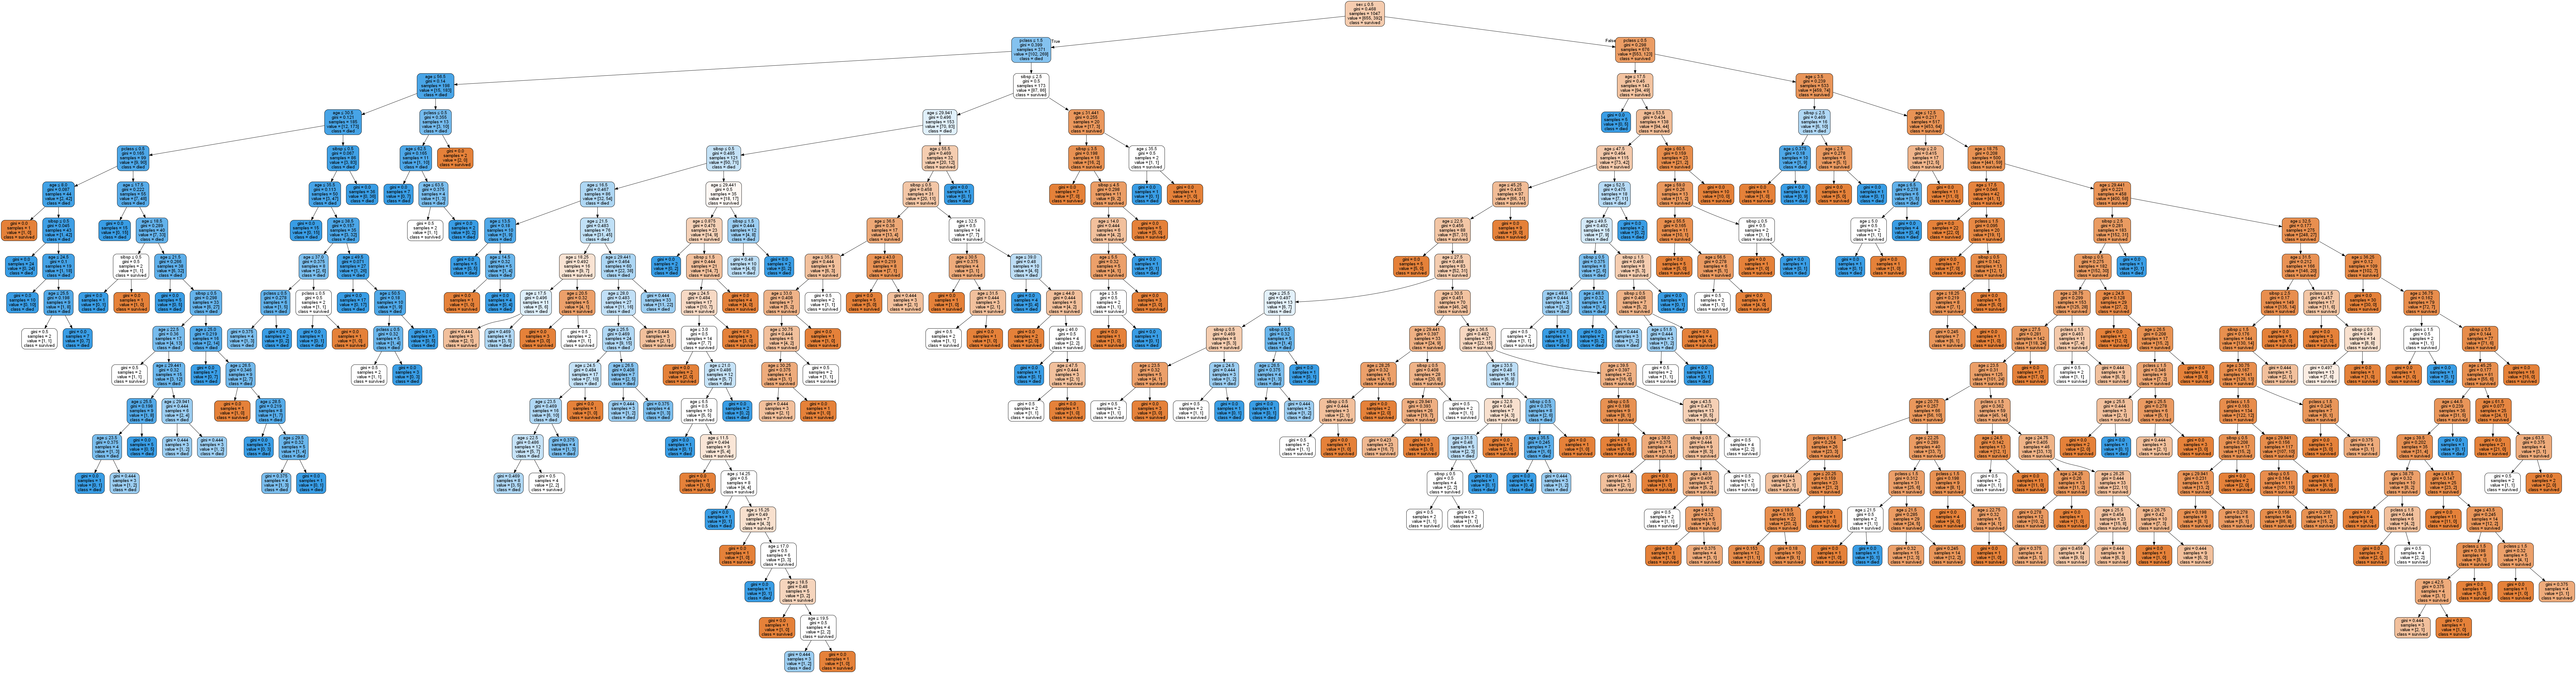

In [6]:
#plot the decision tree
import graphviz
import pydotplus
from IPython.display import Image
target_names = ['survived','died']
dot_data = tree.export_graphviz(clf,  feature_names=vec.feature_names_,  class_names=target_names,  filled=True, rounded=True,  special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# 
Step3: print out the performance measures of the full model: in‐sample and out-of‐sample accuracy.

In [7]:
#use cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectPercentile,chi2
import numpy as np
percentiles = range(1,100)
results = []
for i in percentiles:
    fs = SelectPercentile(chi2,percentile=i)
    X_train_fs = fs.fit_transform(X_train,y_train)
    scores = cross_val_score(clf, X_train_fs,y_train,cv=10)
    results = np.append(results,scores.mean())

In [8]:
y_predict_test = clf.predict(X_test)
y_predict_train= clf.predict(X_train)
from sklearn.metrics import accuracy_score
print ("accuracy in sample(training set) : ", accuracy_score(y_train, y_predict_train))
print ("accuracy out of sample (test set) : ", accuracy_score(y_test, y_predict_test))
print("\n")

#print performance of full model by using confusion matrix
from sklearn.metrics import confusion_matrix
#training set
A=confusion_matrix(y_train, y_predict_train)
print("Percent of survivors correctly predicted(on training set):",A[1][1]/(A[1][1]+A[1][0]))
print("Percent of fatalities correctly predicted(on training set):",A[0][0]/(A[0][1]+A[0][0]))
print("\n")

#test set
B=confusion_matrix(y_test, y_predict_test)
print("Percent of survivors correctly predicted(on test set):",B[1][1]/(B[1][1]+B[1][0]))
print("Percent of fatalities correctly predicted(on test set):",B[0][0]/(B[0][1]+B[0][0]))


accuracy in sample(training set) :  0.8815663801337154
accuracy out of sample (test set) :  0.7519083969465649


Percent of survivors correctly predicted(on training set): 0.7678571428571429
Percent of fatalities correctly predicted(on training set): 0.9496183206106871


Percent of survivors correctly predicted(on test set): 0.6481481481481481
Percent of fatalities correctly predicted(on test set): 0.8246753246753247


# 
Step4: use cross‐validation to find the best parameter to prune the tree. Should be able to plot a graph with the ‘tree size’ as the x-axis and ‘number of misclassification’ as the Y-axis. Find the minimum number of misclassification and choose the corresponding tree size to prune the tree.

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
#set tree size
tree_size = range(2,10)
#calculate the number of misclassifiction by using confusion matrix
misclf = []

for i in tree_size:
    param = {'criterion':['gini','entropy'], "min_samples_split":range(2,4,8), "max_depth":[None,2,4,6,8], "min_samples_leaf":[3,5,8], "max_leaf_nodes": [i]}
    grid_search = GridSearchCV(clf,param,cv=10)
    grid_search.fit(X_test,y_test)
    y_predict_test = grid_search.predict(X_test)
    a = confusion_matrix(y_test, y_predict_test)
    misclf.append(a[0][1]+a[1][0])
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 9, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.7861823361823361


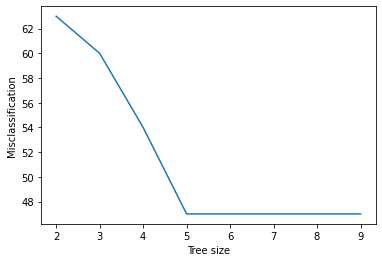

In [10]:
import matplotlib.pyplot as plt
plt.plot(tree_size,misclf)
plt.xlabel('Tree size')
plt.ylabel('Misclassification')
plt.show()

# 
Step5: prune the tree with the optimal tree size. Plot the pruned tree.

accuracy: 0.7824427480916031


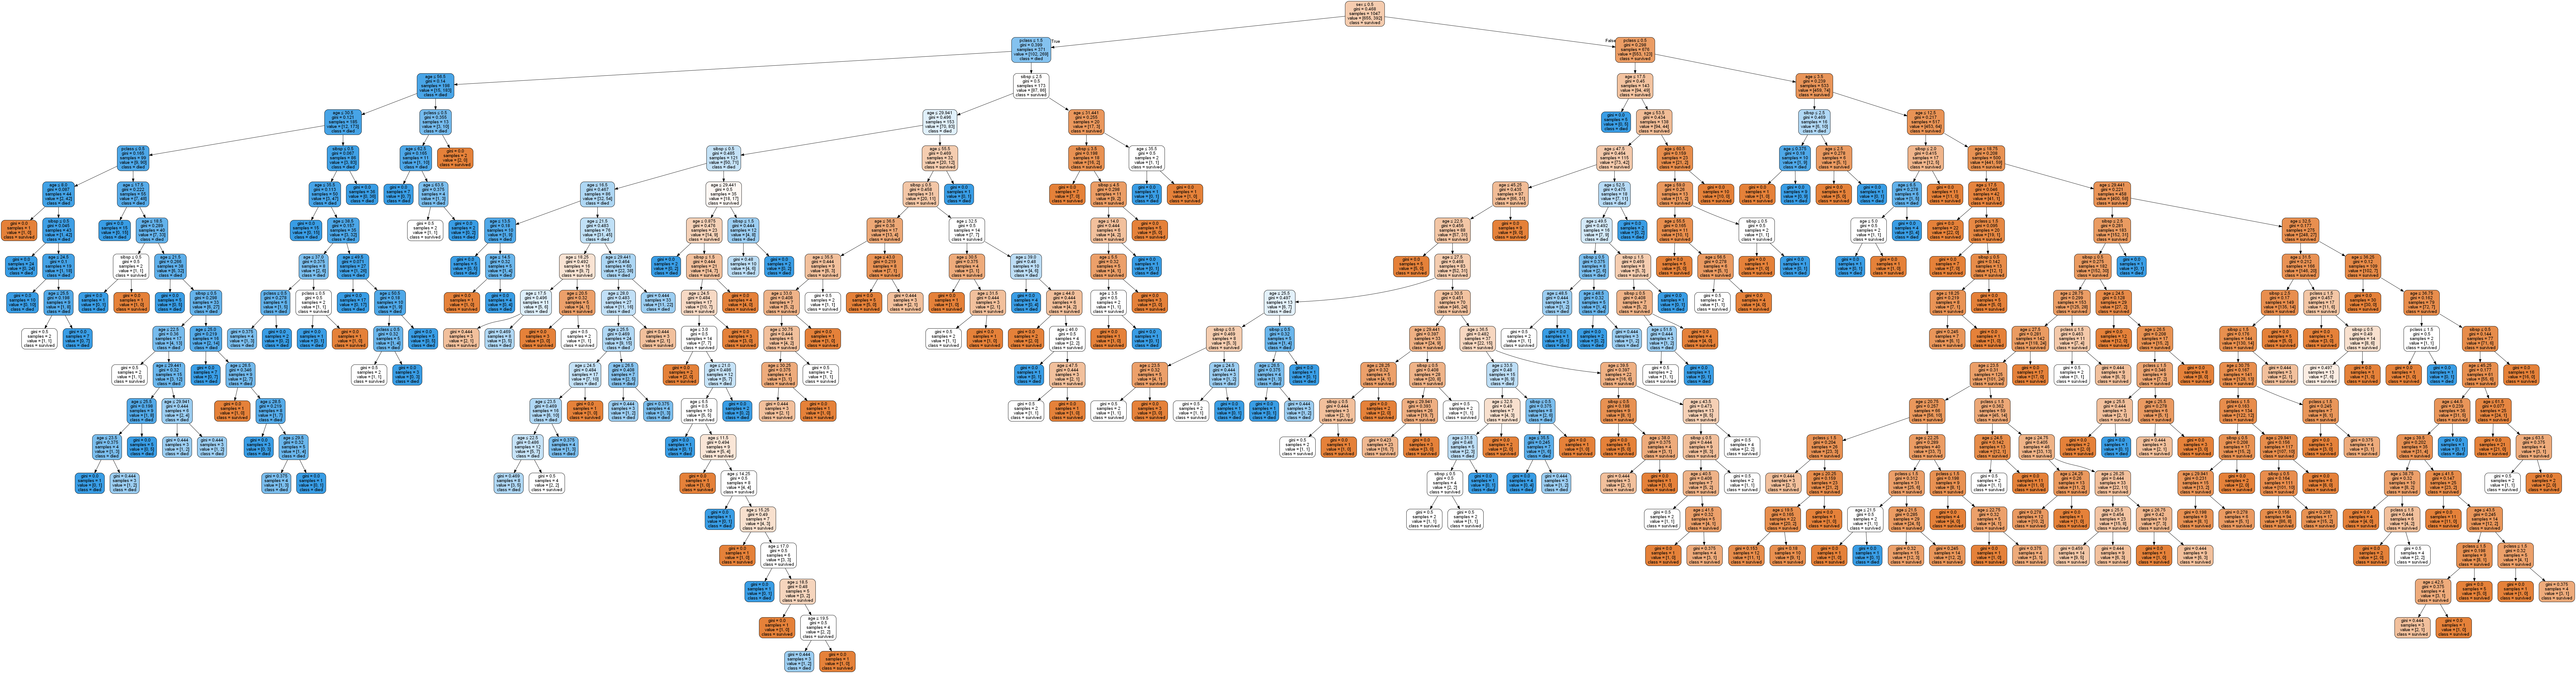

In [11]:
# prune the best tree
best_tree=tree.DecisionTreeClassifier(criterion='gini',max_leaf_nodes=5)
best_tree=best_tree.fit(X_train,y_train)
print('accuracy:',best_tree.score(X_test,y_test))
import graphviz 
from IPython.display import Image
target_names = ['survived','died']
dot_data = tree.export_graphviz(clf, feature_names=vec.feature_names_, class_names=target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# 
Step6: for the final pruned tree, report its in‐sample and out‐of‐sample accuracy.

In [12]:
from sklearn.metrics import accuracy_score
print ("accuracy in sample(training set) : ", accuracy_score(y_train, y_predict_train))
print ("accuracy out of sample (test set) : ", accuracy_score(y_test, y_predict_test))
print("\n")

from sklearn.metrics import confusion_matrix
#training set
A=confusion_matrix(y_train, y_predict_train)
print("Percent of survivors correctly predicted(on training set):",A[1][1]/(A[1][1]+A[1][0]))
print("Percent of fatalities correctly predicted(on training set):",A[0][0]/(A[0][1]+A[0][0]))
print("\n")

#test set
B=confusion_matrix(y_test, y_predict_test)
print("Percent of survivors correctly predicted(on test set):",B[1][1]/(B[1][1]+B[1][0]))
print("Percent of fatalities correctly predicted(on test set):",B[0][0]/(B[0][1]+B[0][0]))



accuracy in sample(training set) :  0.8815663801337154
accuracy out of sample (test set) :  0.8206106870229007


Percent of survivors correctly predicted(on training set): 0.7678571428571429
Percent of fatalities correctly predicted(on training set): 0.9496183206106871


Percent of survivors correctly predicted(on test set): 0.6574074074074074
Percent of fatalities correctly predicted(on test set): 0.935064935064935
